In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('out-2023-07-21.csv')
data['bigepsilon'] = (data['epsilon']*data['interval'])/1000
data['alpha'] = data['alpha']*100000
data['max_offset_bits'] = data['epsilon'].apply(lambda x: math.ceil(math.log2(x)))
data['max_counter_bits'] = data['cousize']*4
data['clocksize'] = (data['max_offset_bits']*data['offsize'])/64 + 1 + 1 + data['cousize']/64

In [3]:
data

,offsize,cousize,num_procs,epsilon,interval,delta,alpha,num_events,offsetscount,counterscount,maxOffset,maxCounter,bigepsilon,max_offset_bits,max_counter_bits,clocksize
0,1.06201,0.156131,32,100,10,1,10.0,17,339842,49962,63,1,1.0,7,0.624524,2.118597
1,1.10080,0.182897,32,100,10,1,20.0,23,352256,58527,90,1,1.0,7,0.731588,2.123258
2,1.25824,0.153141,32,100,10,1,40.0,38,402637,49005,97,1,1.0,7,0.612564,2.140013
3,1.90750,0.120781,32,100,10,1,80.0,71,610399,38650,98,1,1.0,7,0.483124,2.210520
4,4.11060,0.027741,32,100,10,1,160.0,341,1315393,8877,99,2,1.0,7,0.110962,2.450030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,2.32317,0.000000,64,1000,6,512,20.0,114,1486832,0,997,0,6.0,10,0.000000,2.362995
4352,4.08178,0.000000,64,1000,6,512,40.0,237,2612338,0,999,0,6.0,10,0.000000,2.637778
4353,12.82180,0.002758,64,1000,6,512,80.0,534,8205969,1765,999,1,6.0,10,0.011031,4.003449
4354,30.78240,0.001639,64,1000,6,512,160.0,1016,19700754,1049,999,1,6.0,10,0.006556,6.809776


In [4]:
for column in data.columns:
    print(data[column].value_counts())

1.00010     4
54.37070    2
17.29450    2
54.24780    2
1.22594     2
           ..
1.30653     1
1.78439     1
3.91725     1
11.33350    1
45.63560    1
Name: offsize, Length: 4332, dtype: int64
0.000000    1066
0.000650       4
0.005056       3
0.000131       3
0.026959       3
            ... 
0.001978       1
0.044672       1
0.043581       1
0.006781       1
0.005880       1
Name: cousize, Length: 3019, dtype: int64
32    2178
64    2178
Name: num_procs, dtype: int64
1000    720
500     648
200     576
250     576
100     504
400     324
600     240
750     240
300     216
150     192
800     120
Name: epsilon, dtype: int64
10    624
5     564
20    480
4     444
8     324
2     228
6     228
15    204
12    204
40    180
30    180
1     120
3     120
25     96
16     96
24     96
50     84
60     84
Name: interval, dtype: int64
1      504
2      504
4      504
8      504
16     504
32     504
64     504
128    432
256    264
512    132
Name: delta, dtype: int64
10.0     726
20.0 

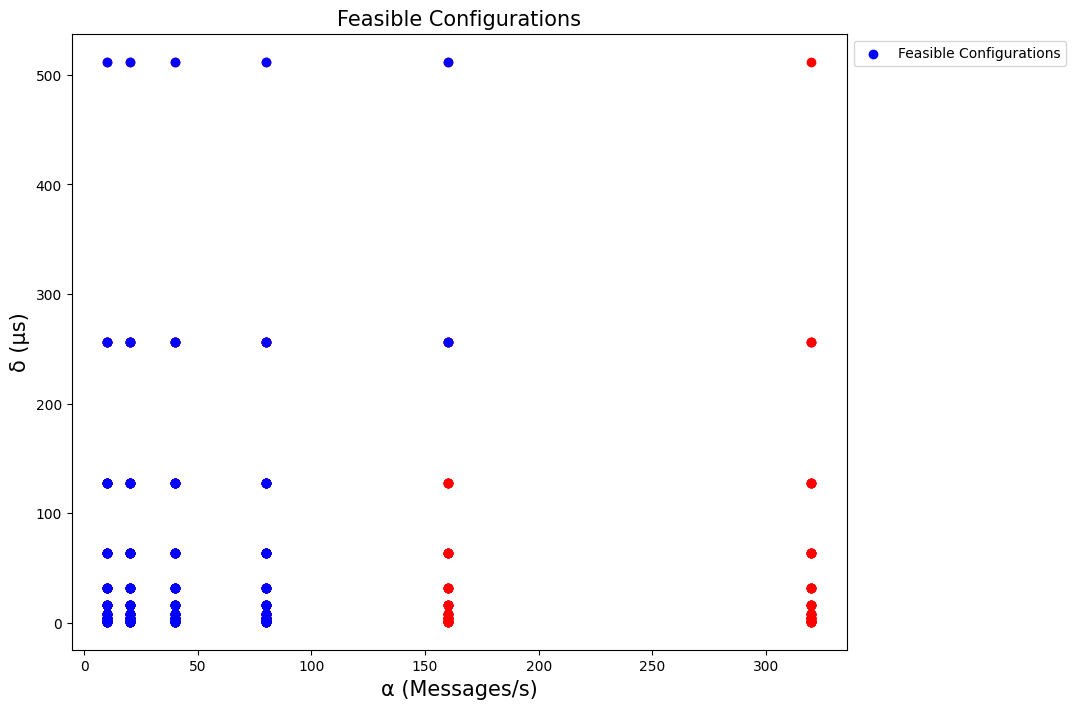

In [5]:
# Feasibility regions

bigeps = 2
N = 32

df = data[(data['bigepsilon'] == bigeps) & (data['num_procs'] == N)]

feasible = df[df['offsize'] < 8][['delta', 'alpha']]
feasible

fig, ax = plt.subplots(figsize=(10, 8))
# Plot the original DataFrame
plt.scatter(df['alpha'], df['delta'], color = 'red')

# Highlight the points from the subset DataFrame
plt.scatter(feasible['alpha'], feasible['delta'], color='blue', label='Feasible Configurations')

# Add labels and legend (if needed)
plt.xlabel('α (Messages/s)', fontsize = 15)
plt.ylabel('δ (μs)', fontsize = 15)
plt.title('Feasible Configurations', fontsize = 15)
plt.savefig('feasible.N{N}.E{bigeps}.png'.format(N=N, bigeps=bigeps))
plt.legend(bbox_to_anchor=(1,1))

# Show the plot
plt.show()

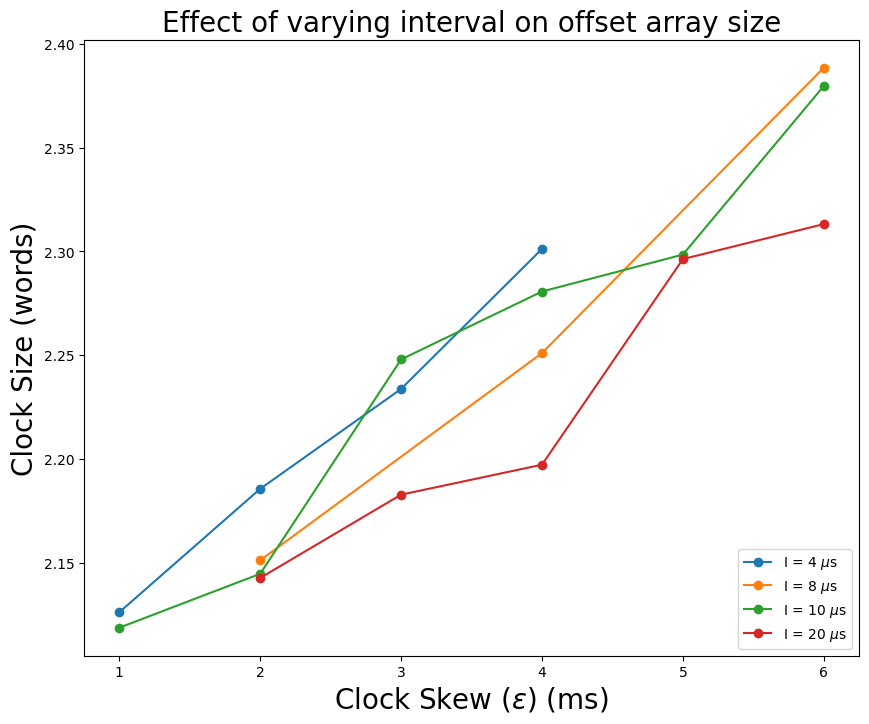

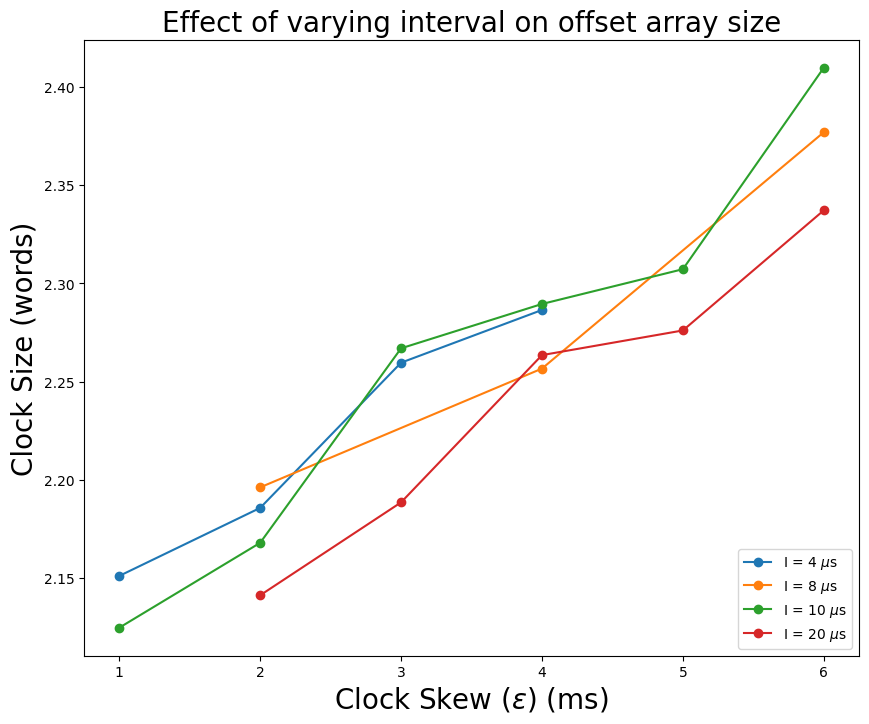

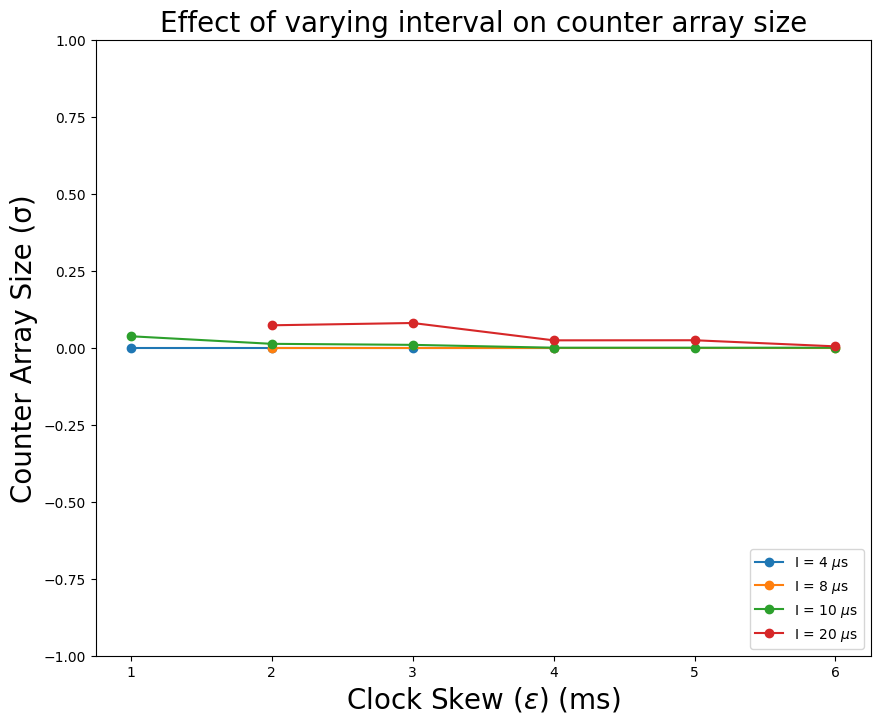

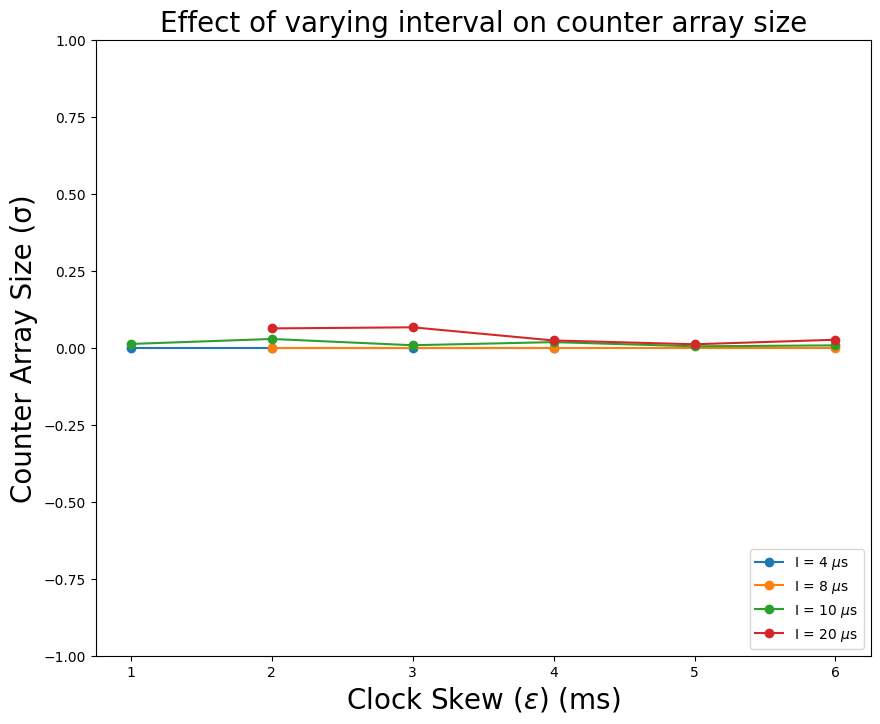

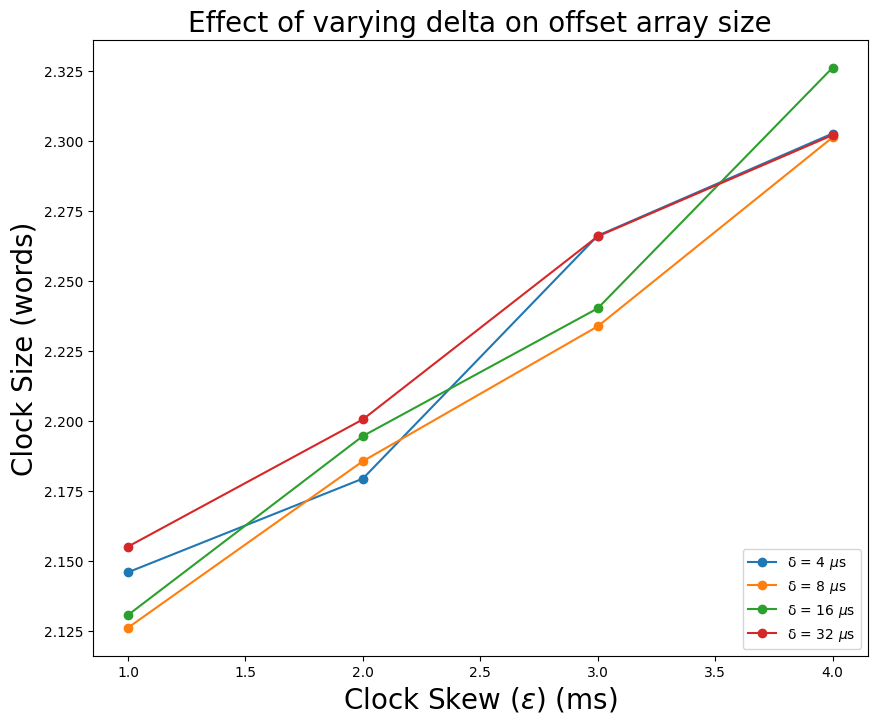

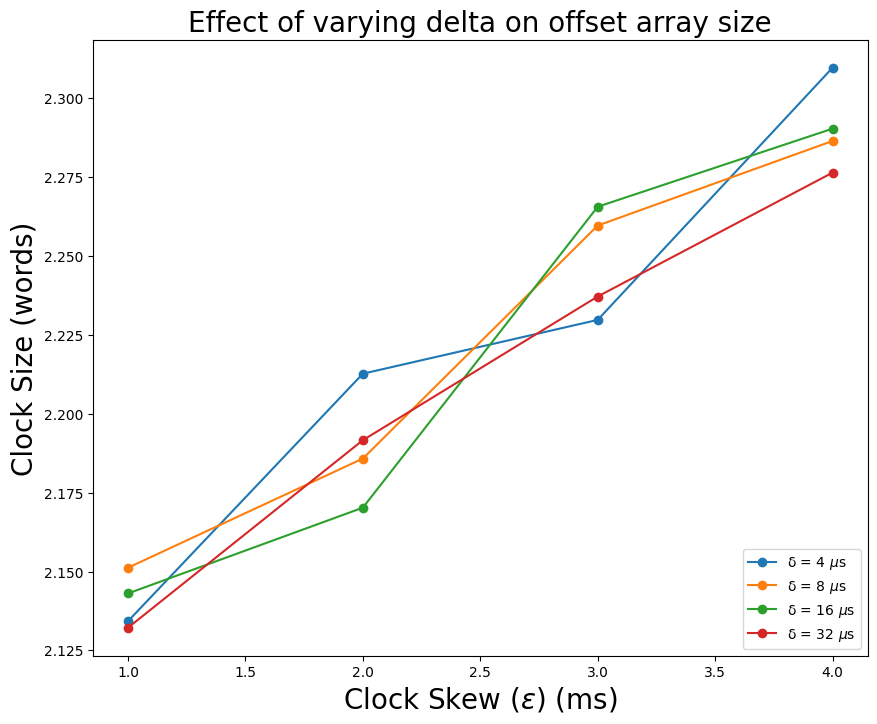

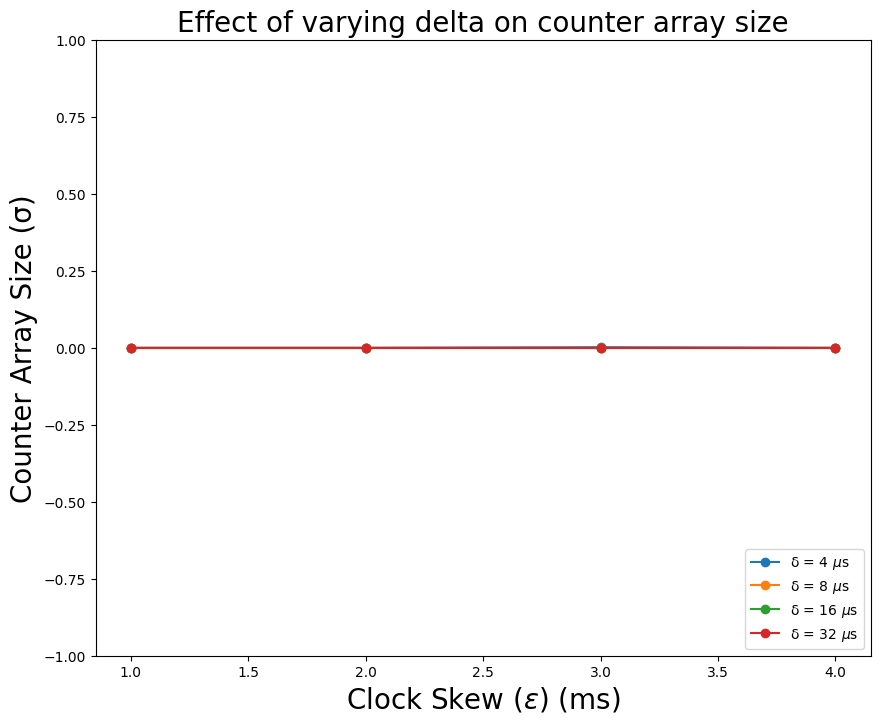

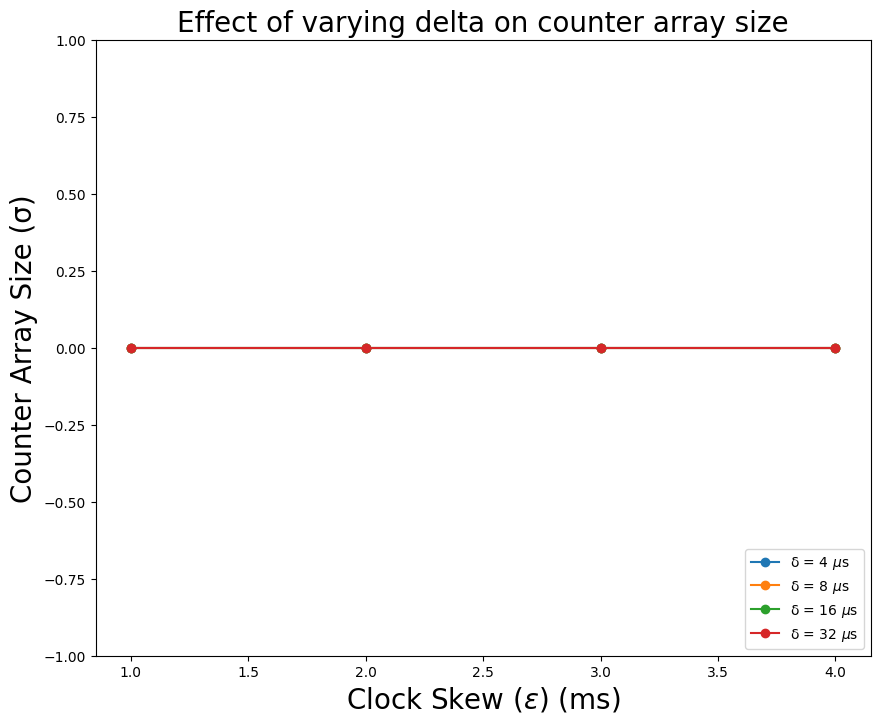

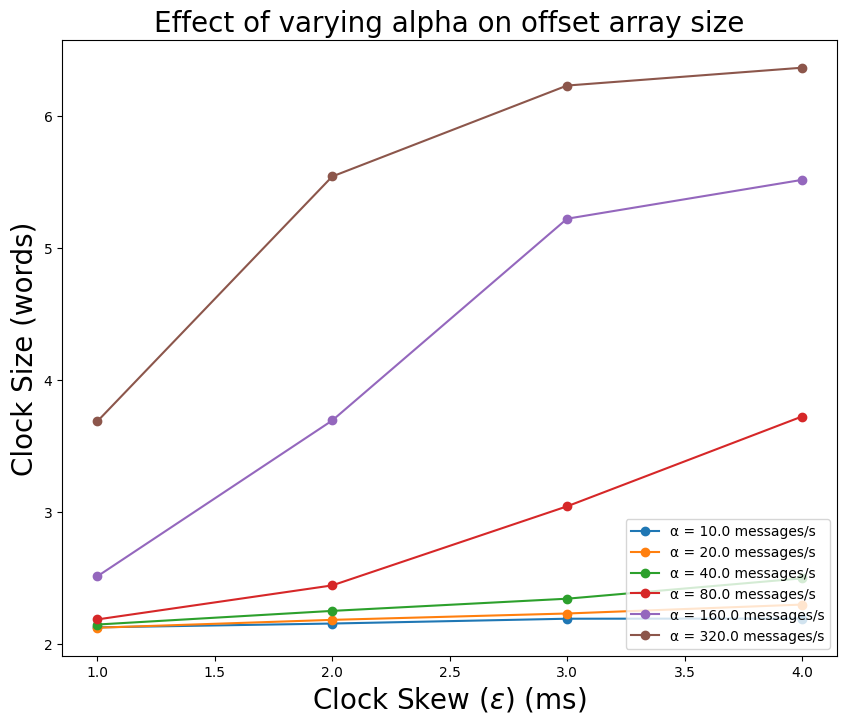

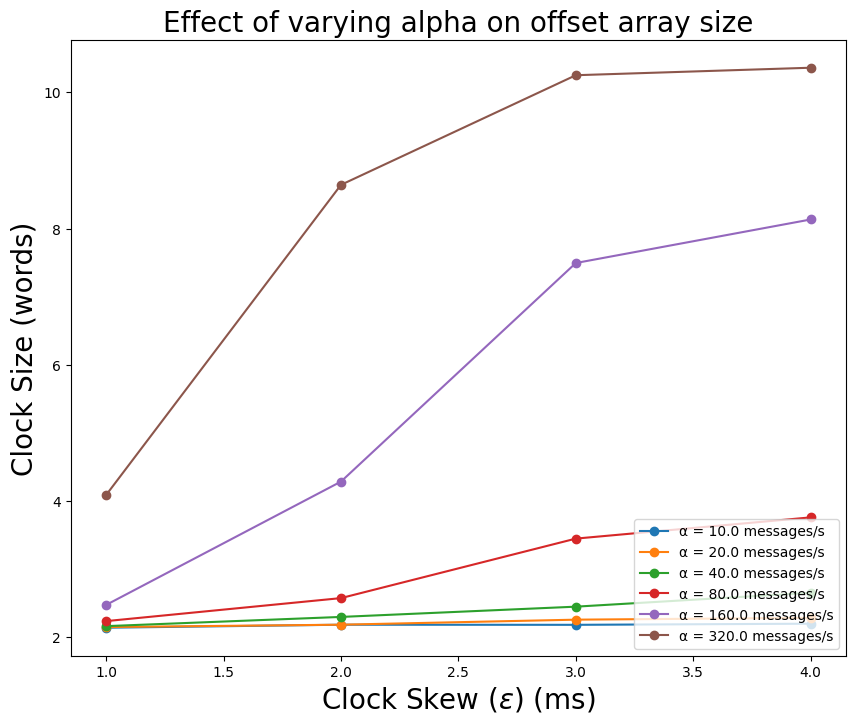

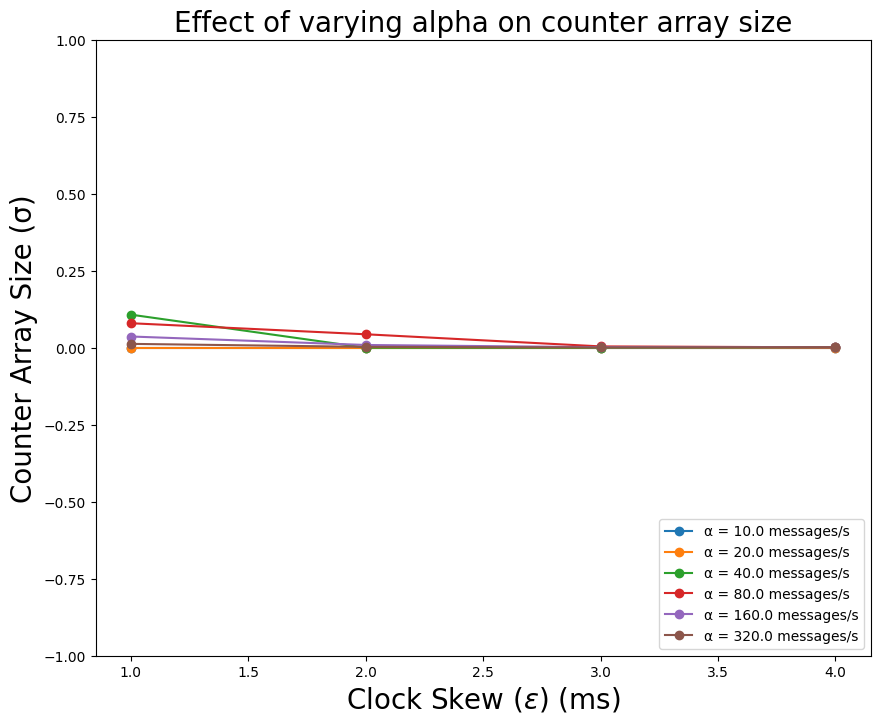

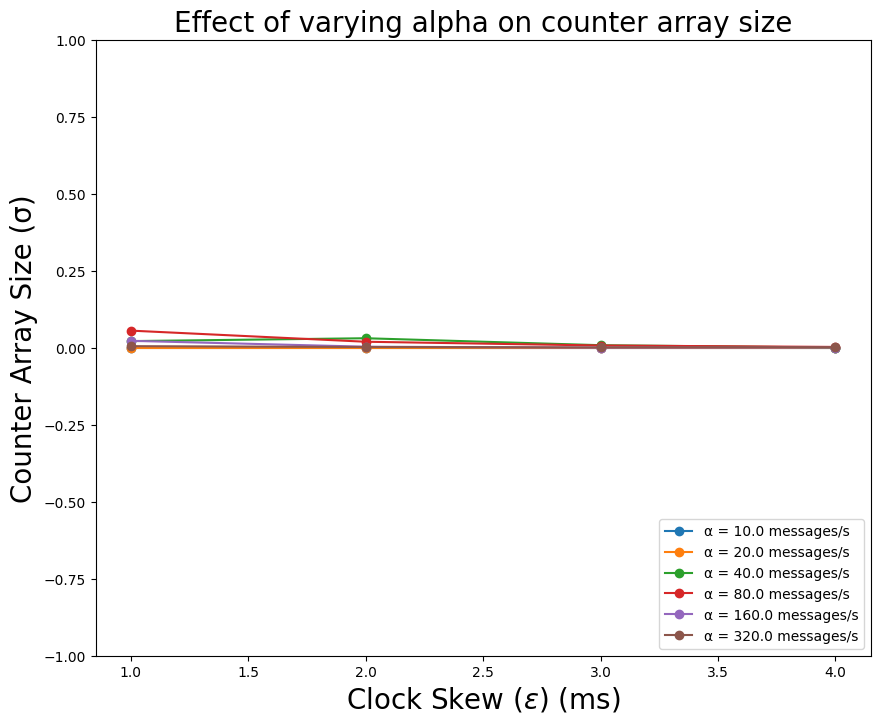

In [9]:
# Effect of epsilon

interval = 4
delta = 8
alpha = 20

# Varying interval


for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for interval in [4, 8, 10, 20]:
        sample_df = data[(data['interval'] == interval) & (data['delta'] == delta) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['bigepsilon'], sample_df['clocksize'], marker = 'o', label = 'I = {interval} $\mu$s'.format(interval=interval))    
    plt.xlabel('Clock Skew ($\epsilon$) (ms)', fontsize = 20)
    plt.ylabel('Clock Size (words)', fontsize = 20)
    plt.legend(loc='lower right')
    plt.title('Effect of varying interval on offset array size', fontsize = 20)
    plt.savefig('IvOff.N{}.D{}.A{}.png'.format(N, delta, alpha))
    plt.show()

interval = 4
delta = 8
alpha = 20


for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for interval in [4, 8, 10, 20]:
        sample_df = data[(data['interval'] == interval) & (data['delta'] == delta) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['bigepsilon'], sample_df['cousize'], marker = 'o', label = 'I = {interval} $\mu$s'.format(interval=interval))    
    plt.xlabel('Clock Skew ($\epsilon$) (ms)', fontsize = 20)
    plt.ylabel('Counter Array Size (σ)', fontsize = 20)
    plt.ylim(-1, 1)
    plt.legend(loc='lower right')
    plt.title('Effect of varying interval on counter array size', fontsize = 20)
    plt.savefig('IvCou.N{}.D{}.A{}.png'.format(N, delta, alpha))
    plt.show()

interval = 4
delta = 8
alpha = 20

# Varying delta

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for delta in [4, 8, 16, 32]:
        sample_df = data[(data['delta'] == delta) & (data['interval'] == interval) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['bigepsilon'], sample_df['clocksize'], marker = 'o', label = 'δ = {delta} $\mu$s'.format(delta=delta))    
    plt.xlabel('Clock Skew ($\epsilon$) (ms)', fontsize = 20)
    plt.ylabel('Clock Size (words)', fontsize = 20)
    plt.legend(loc='lower right')
    plt.title('Effect of varying delta on offset array size', fontsize = 20)
    plt.savefig('DvOff.N{}.I{}.A{}.png'.format(N, interval, alpha))
    plt.show()

interval = 4
delta = 8
alpha = 20

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for delta in [4, 8, 16, 32]:
        sample_df = data[(data['delta'] == delta) & (data['interval'] == interval) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['bigepsilon'], sample_df['cousize'], marker = 'o', label = 'δ = {delta} $\mu$s'.format(delta=delta))    
    plt.xlabel('Clock Skew ($\epsilon$) (ms)', fontsize = 20)
    plt.ylabel('Counter Array Size (σ)', fontsize = 20)
    plt.ylim(-1, 1)
    plt.legend(loc='lower right')
    plt.title('Effect of varying delta on counter array size', fontsize = 20)
    plt.savefig('DvCou.N{}.I{}.A{}.png'.format(N, interval, alpha))
    plt.show()


interval = 4
delta = 8
alpha = 20

# Varying alpha

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for alpha in data['alpha'].unique():
        sample_df = data[(data['delta'] == delta) & (data['interval'] == interval) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['bigepsilon'], sample_df['clocksize'], marker = 'o', label = 'α = {alpha} messages/s'.format(alpha=alpha))    
    plt.xlabel('Clock Skew ($\epsilon$) (ms)', fontsize = 20)
    plt.ylabel('Clock Size (words)', fontsize = 20)
    plt.legend(loc='lower right')
    plt.title('Effect of varying alpha on offset array size', fontsize = 20)
    plt.savefig('AvOff.N{}.I{}.D{}.png'.format(N, interval, delta))
    plt.show()

interval = 4
delta = 8
alpha = 20

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for alpha in data['alpha'].unique():
        sample_df = data[(data['delta'] == delta) & (data['interval'] == interval) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['bigepsilon'], sample_df['cousize'], marker = 'o', label = 'α = {alpha} messages/s'.format(alpha=alpha))    
    plt.xlabel('Clock Skew ($\epsilon$) (ms)', fontsize = 20)
    plt.ylabel('Counter Array Size (σ)', fontsize = 20)
    plt.ylim(-1, 1)
    plt.legend(loc='lower right')
    plt.title('Effect of varying alpha on counter array size', fontsize = 20)
    plt.savefig('AvCou.N{}.I{}.D{}.png'.format(N, interval, delta))
    plt.show()



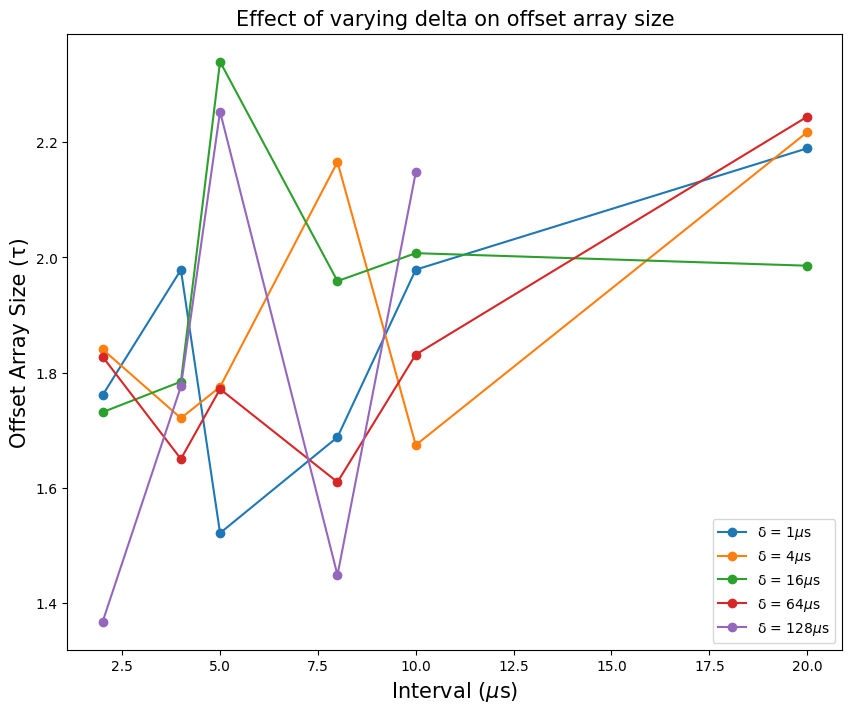

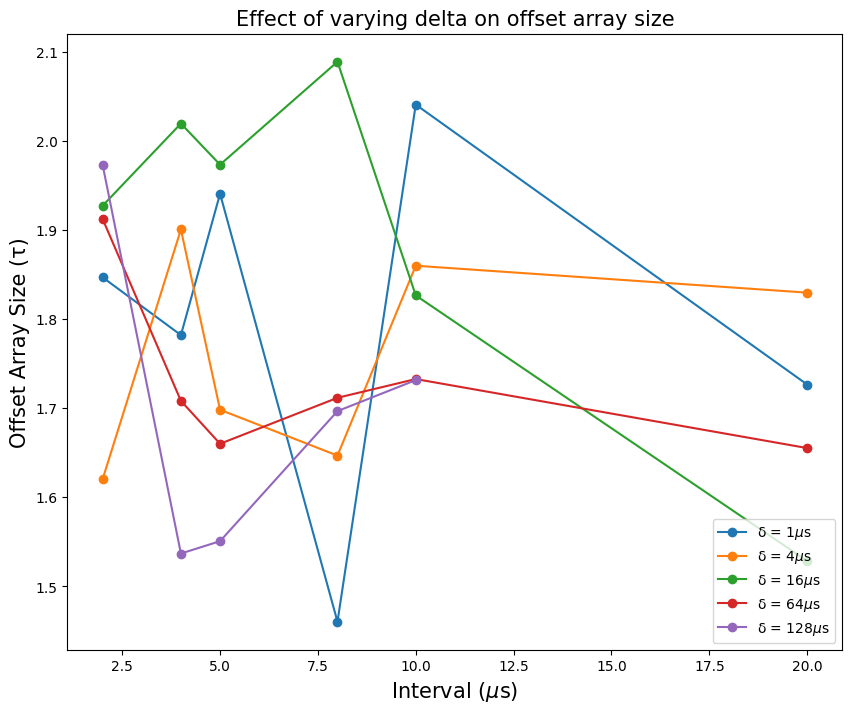

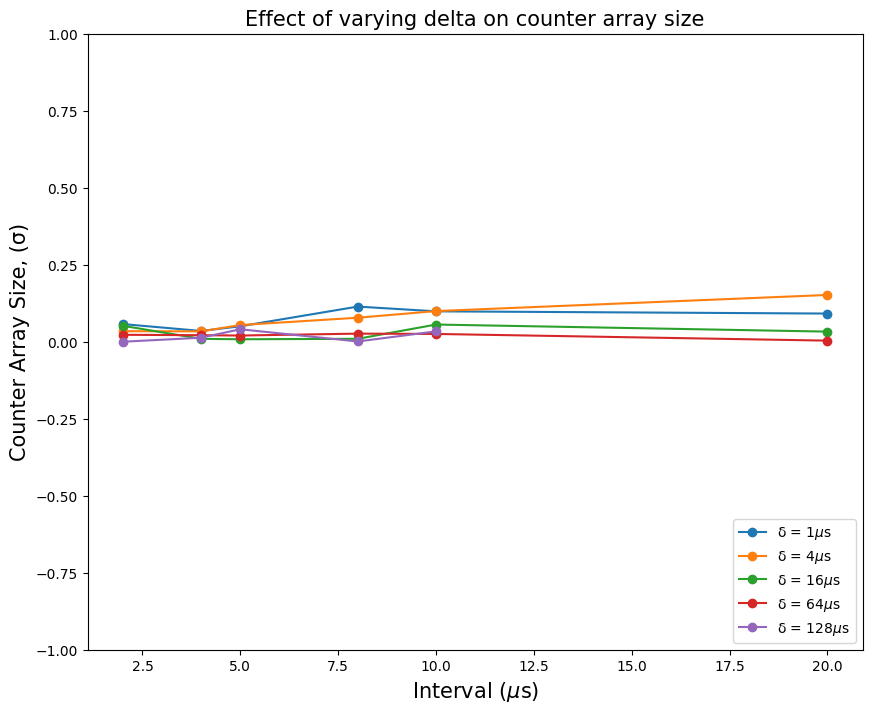

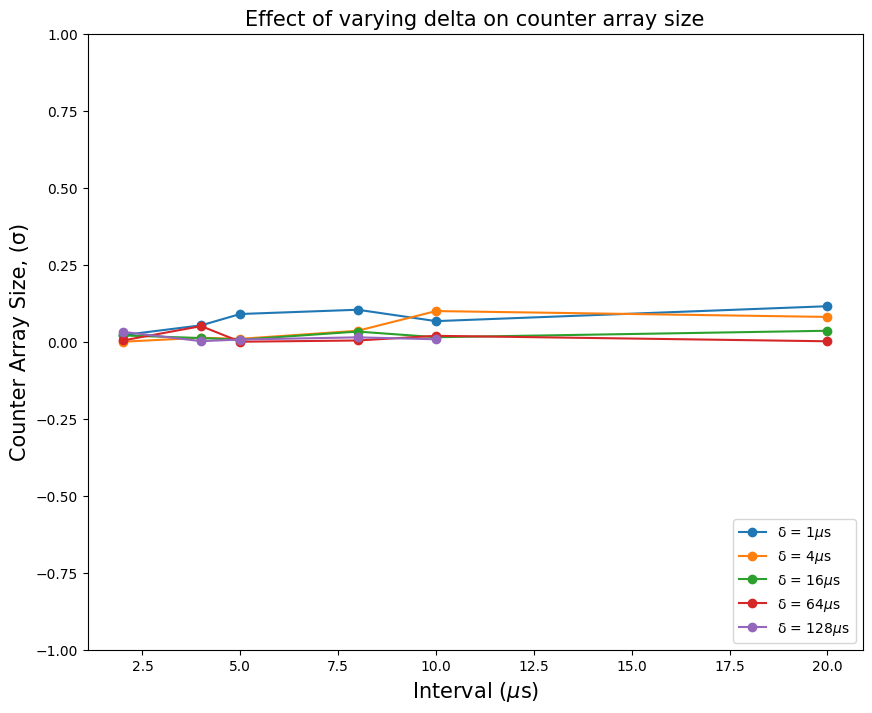

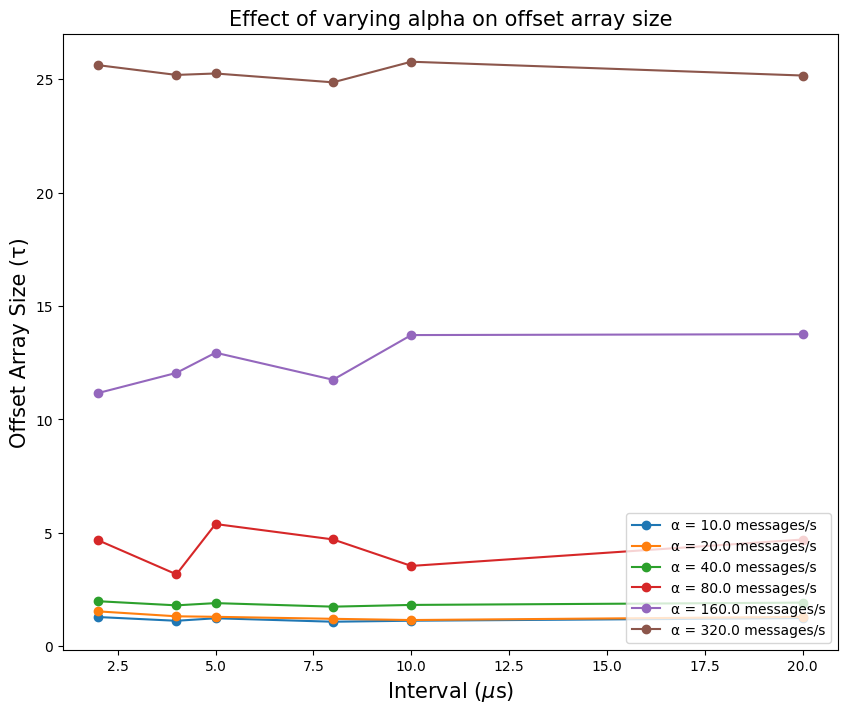

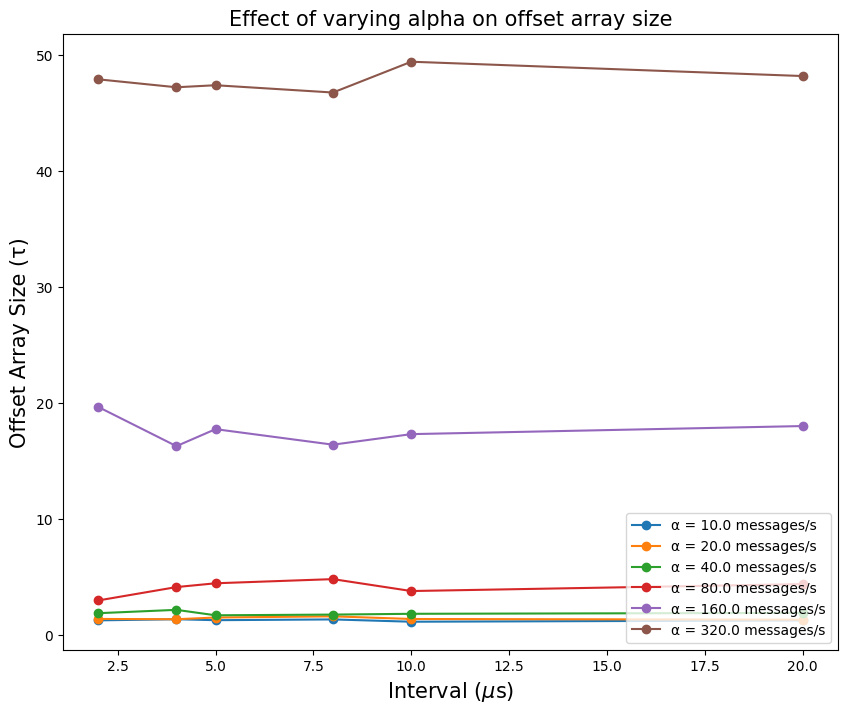

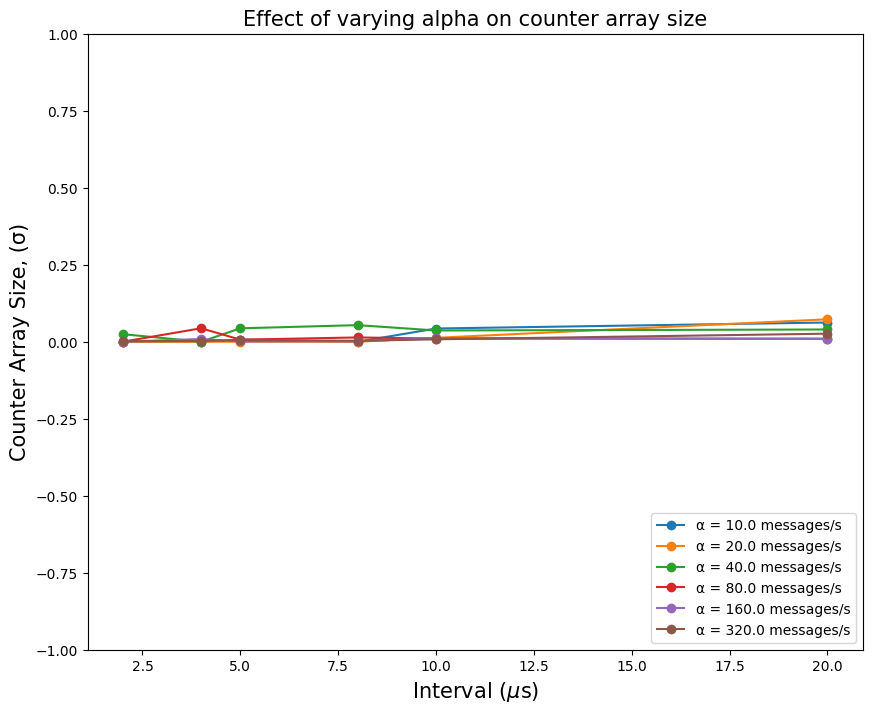

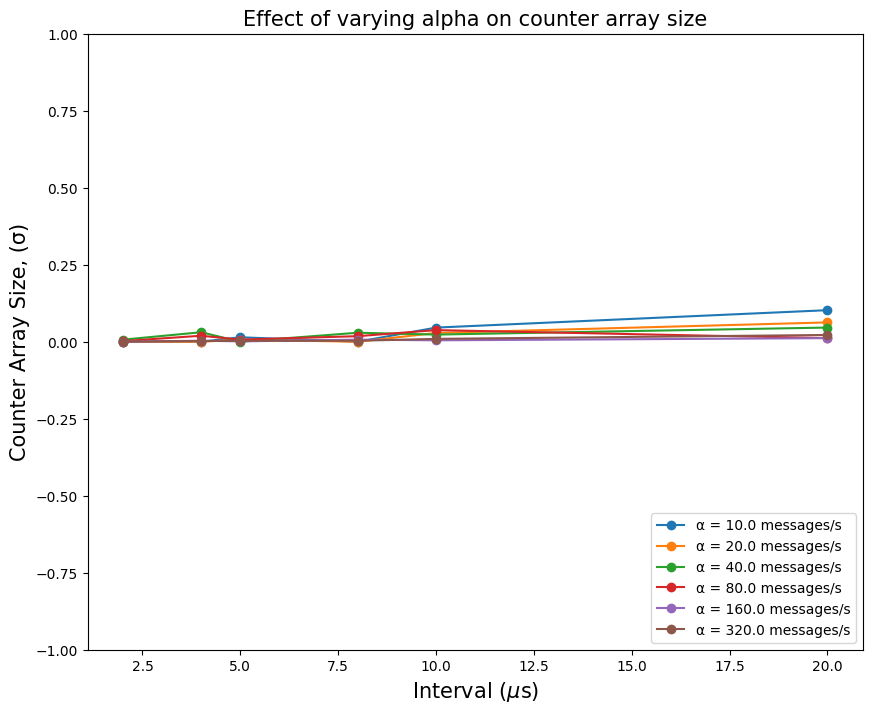

In [21]:
# Effect of interval

# α, σ, δ, τ


epsilon = 2
delta = 8
alpha = 20

# Varying delta

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for delta in [1, 4, 16, 64, 128]:
        sample_df = data[(data['delta'] == delta) & (data['bigepsilon'] == epsilon) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['interval'], sample_df['offsize'], marker = 'o', label = 'δ = {delta}$\mu$s'.format(delta=delta))    
    plt.xlabel('Interval ($\mu$s)', fontsize=15)
    plt.ylabel('Offset Array Size (τ)', fontsize=15)
    plt.legend(loc='lower right')
    plt.title('Effect of varying delta on offset array size', fontsize=15)
    plt.savefig('DvOff.N{}.E{}.A{}.png'.format(N, epsilon, alpha))
    plt.show()

epsilon = 2
delta = 8
alpha = 20

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for delta in [1, 4, 16, 64, 128]:
        sample_df = data[(data['delta'] == delta) & (data['bigepsilon'] == epsilon) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['interval'], sample_df['cousize'], marker = 'o', label = 'δ = {delta}$\mu$s'.format(delta=delta))    
    plt.xlabel('Interval ($\mu$s)', fontsize=15)
    plt.ylabel('Counter Array Size, (σ)', fontsize=15)
    plt.ylim(-1, 1)
    plt.legend(loc='lower right')
    plt.title('Effect of varying delta on counter array size', fontsize=15)
    plt.savefig('DvCou.N{}.E{}.A{}.png'.format(N, epsilon, alpha))
    plt.show()


epsilon = 2
delta = 8
alpha = 20

# Varying alpha

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for alpha in data['alpha'].unique():
        sample_df = data[(data['delta'] == delta) & (data['bigepsilon'] == epsilon) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['interval'], sample_df['offsize'], marker = 'o', label = 'α = {alpha} messages/s'.format(alpha=alpha))    
    plt.xlabel('Interval ($\mu$s)', fontsize=15)
    plt.ylabel('Offset Array Size (τ)', fontsize=15)
    plt.legend(loc='lower right')
    plt.title('Effect of varying alpha on offset array size', fontsize=15)
    plt.savefig('AvOff.N{}.E{}.D{}.png'.format(N, epsilon, delta))
    plt.show()

epsilon = 2
delta = 8
alpha = 20

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for alpha in data['alpha'].unique():
        sample_df = data[(data['delta'] == delta) & (data['bigepsilon'] == epsilon) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['interval'], sample_df['cousize'], marker = 'o', label = 'α = {alpha} messages/s'.format(alpha=alpha))    
    plt.xlabel('Interval ($\mu$s)', fontsize=15)
    plt.ylabel('Counter Array Size, (σ)', fontsize=15)
    plt.ylim(-1, 1)
    plt.legend(loc='lower right')
    plt.title('Effect of varying alpha on counter array size', fontsize=15)
    plt.savefig('AvCou.N{}.E{}.D{}.png'.format(N, epsilon, delta))
    plt.show()


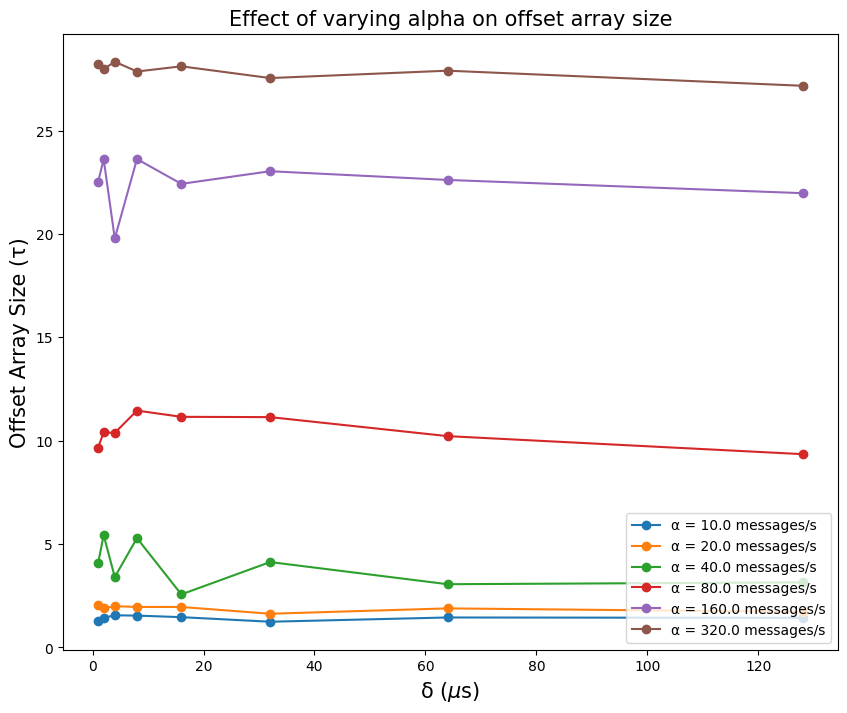

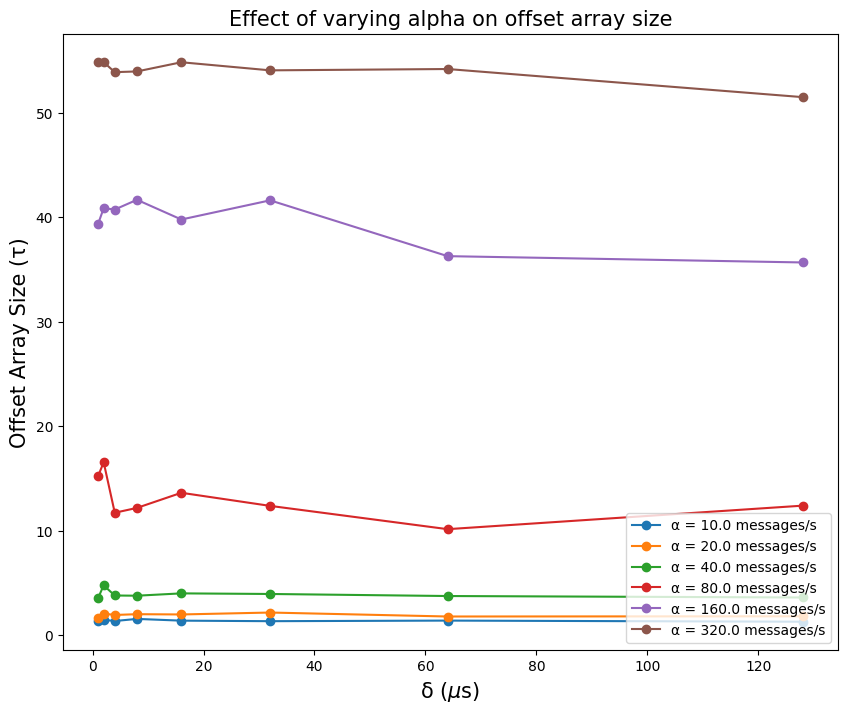

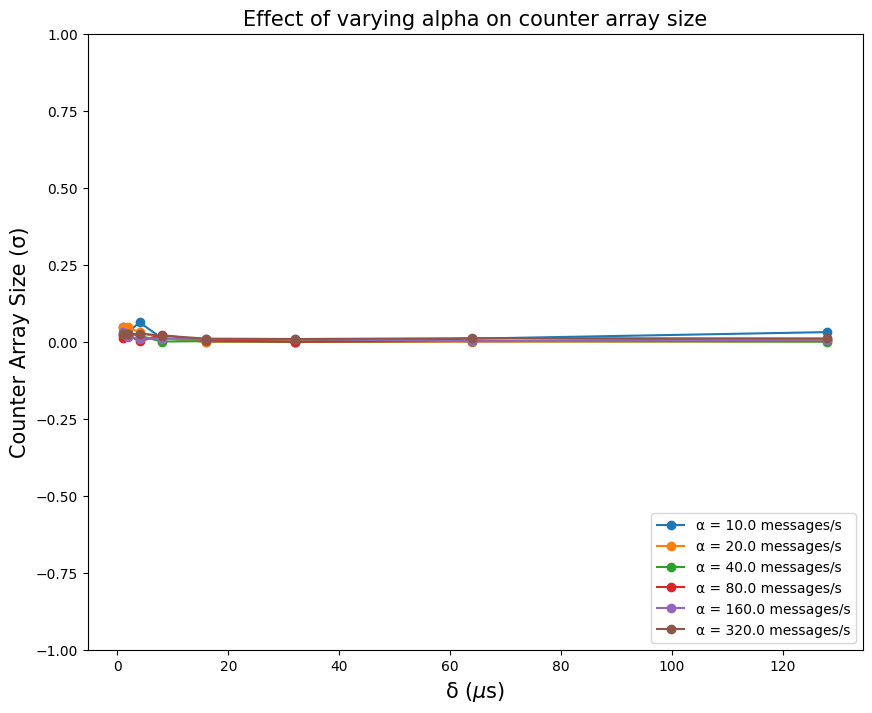

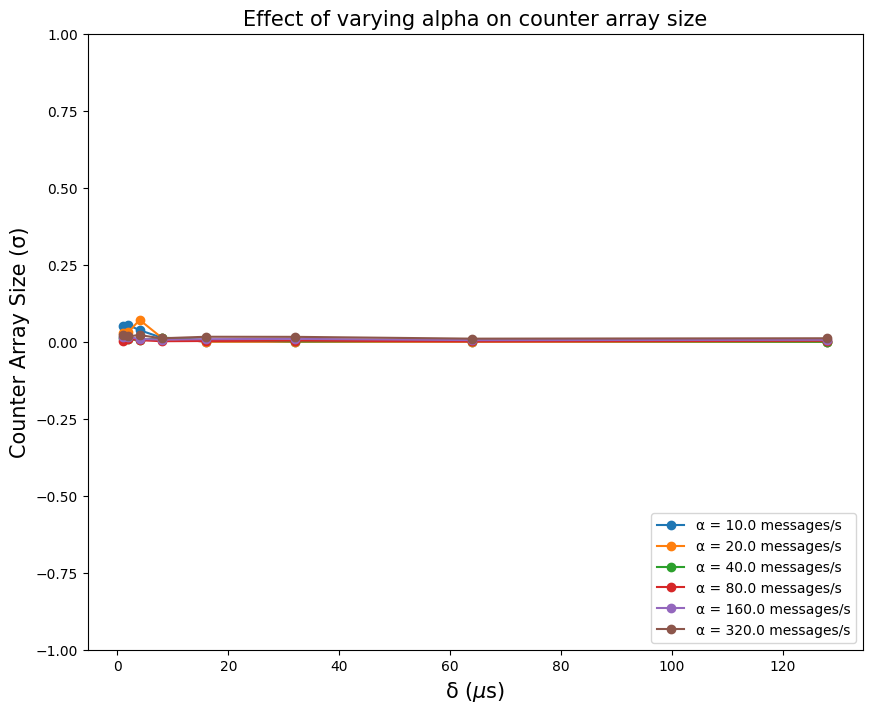

In [20]:
# Effect of delta

interval = 16
epsilon = 250
alpha = 20

# α, σ, δ, τ

# Varying alpha

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for alpha in data['alpha'].unique():
        sample_df = data[(data['interval'] == interval) & (data['epsilon'] == epsilon) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['delta'], sample_df['offsize'], marker = 'o', label = 'α = {alpha} messages/s'.format(alpha=alpha))    
    plt.xlabel('δ ($\mu$s)', fontsize=15)
    plt.ylabel('Offset Array Size (τ)', fontsize=15)
    plt.legend(loc='lower right')
    plt.title('Effect of varying alpha on offset array size', fontsize=15)
    plt.savefig('AvOff.N{}.E{}.I{}.png'.format(N, epsilon, interval))
    plt.show()

interval = 16
epsilon = 250
alpha = 20

for N in [32, 64]:
    fig, ax = plt.subplots(figsize=(10, 8))
    for alpha in data['alpha'].unique():
        sample_df = data[(data['interval'] == interval) & (data['epsilon'] == epsilon) & (data['alpha'] == alpha) & (data['num_procs'] == N)]  
        plt.plot(sample_df['delta'], sample_df['cousize'], marker = 'o', label = 'α = {alpha} messages/s'.format(alpha=alpha))    
    plt.xlabel('δ ($\mu$s)', fontsize=15)
    plt.ylabel('Counter Array Size (σ)', fontsize=15)
    plt.ylim(-1, 1)
    plt.legend(loc='lower right')
    plt.title('Effect of varying alpha on counter array size', fontsize=15)
    plt.savefig('AvCou.N{}.E{}.I{}.png'.format(N, epsilon, interval))
    plt.show()
